<a href="https://colab.research.google.com/github/okiejake/worldwide-internet-statistics/blob/main/Jacob_Roan_Capstone_3_Internet_Expansion_Opportunities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
 
My hypothetical scenario is as a data analyst for a large communications company I’m tasked with finding insights on mobile and fixed broadband speeds. The development of our technologies will be necessitated by which countries need it most. I also plan on determining if internet speed is correlated to economic growth.
 
 
In this notebook I plan on reviewing data on mobile and wired broadband speed averages worldwide as well as the world's economy. Specifically I want to compare countries and draw conclusions on how internet quality affects these countries' economies.
 
### About the data
 
The speed data is taken from speedtest.nets Global Index. It only represents countries that had at least 300 unique user results for mobile or fixed broadband.
 
The other dataset is a table of GDP per capita for each country. It includes data for most countries going all the way back to the 1950s but for our purposes I'll only be using the most recent year for now.
 
### Why it matters
 
This data will give us insight on how to expand to these countries, whether countries should care more about mobile or fixed broadband, and if our products can be viable in certain economies.

## Importin'

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_theme(rc = {'figure.figsize':(14,9)})
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches

## Wranglin'

### Mobile data download speeds

In [ ]:
mobileDF = pd.read_html('https://www.speedtest.net/global-index') [2]

mobileDF = mobileDF.dropna(how='all', axis=0).drop(['#.1'], axis=1)

mobileDF.drop(mobileDF.iloc[:, 0:1], inplace = True, axis = 1)
mobileDF

,Country,Mbps
0,United Arab Emirates,133.51
2,Norway,118.58
4,South Korea,116.51
6,Qatar,113.00
8,Netherlands,107.81
...,...,...
266,Somalia,7.74
268,Sudan,6.81
270,Venezuela,5.98
272,Afghanistan,5.39


### Fixed broadband (wired) data download speeds

In [ ]:
wiredDF = pd.read_html('https://www.speedtest.net/global-index') [3]

wiredDF = wiredDF.dropna(how='all', axis=0).drop(['#.1'], axis=1)

wiredDF.drop(wiredDF.iloc[:, 0:1], inplace = True, axis = 1)

wiredDF

,Country,Mbps
0,Chile,197.59
2,Singapore,194.07
4,Monaco,188.66
6,Thailand,182.96
8,Denmark,164.14
...,...,...
350,Syria,2.95
352,Yemen,2.63
354,Turkmenistan,2.05
356,Cuba,1.91


### GDP by year for each country

In [ ]:
gdpDF = pd.read_csv('/content/gdrive/My Drive/Thinkful/Capstone 3/Raw data/gdp-per-capita-maddison-2020.csv')

# keep only rows after 1990
gdpDF = gdpDF[gdpDF.Year >= 1990]

# pivot to wide data
gdpFull= gdpDF.pivot_table(index='Entity', columns='Year', values='GDP per capita')

gdpFull

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,963.00,881.17,843.88,578.40,428.42,632.94,600.18,570.60,545.04,518.66,...,1557.32,1627.67,1792.0,1945.0,2025.0,2022.0,1928.0,1929.00,2014.75,1934.56
Albania,3983.00,2942.10,2841.77,3137.02,3399.71,3666.65,3965.69,3526.99,3873.37,4432.04,...,8859.47,9222.97,9484.0,9592.0,9660.0,9808.0,10032.0,10342.00,10702.12,11104.17
Algeria,4697.00,4708.23,4850.22,4816.92,4856.99,5142.38,5451.63,5638.48,6069.78,6421.51,...,11907.02,12587.74,13204.0,13379.0,13494.0,13744.0,14004.0,14331.00,14267.23,14228.03
Angola,1384.00,1437.15,1389.33,1080.48,1120.85,1319.16,1533.98,1687.32,1811.17,1899.42,...,7087.60,7520.67,8016.0,8190.0,8508.0,8673.0,8689.0,8453.00,8146.44,7771.44
Argentina,10254.00,11223.98,12267.08,12926.79,13571.38,13086.04,13715.23,14722.65,15185.96,14577.83,...,17328.98,18979.99,20003.0,19599.0,19873.0,19183.0,19502.0,18875.00,19200.91,18556.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Offshoots,35619.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48090.15,NaN,NaN,NaN,NaN,NaN,51667.98,52597.22,53756.50
World,8222.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13179.50,NaN,NaN,NaN,NaN,NaN,14700.37,14944.09,15212.42
Yemen,3622.00,3661.92,3759.72,3712.34,3775.07,3823.32,3855.57,3927.68,4044.15,4080.22,...,4593.54,4812.35,4088.0,4077.0,4165.0,4054.0,2844.0,2506.00,2321.92,2284.89


In [ ]:
# Most recent year only
gdp2018 = gdpDF[gdpDF.Year == 2018]

gdp2018 = gdp2018.pivot_table(index='Entity', columns='Year', values='GDP per capita')

gdp2018 

Year,2018
Entity,
Afghanistan,1934.56
Albania,11104.17
Algeria,14228.03
Angola,7771.44
Argentina,18556.38
...,...
Western Offshoots,53756.50
World,15212.42
Yemen,2284.89


## Mergin'

In [ ]:
# merge speedtest data
speedDF = pd.merge(mobileDF, wiredDF, how='outer', on='Country', suffixes=('_mobile','_wired'))

speedDF

# merge gdp data (most recent year) keeps only countries that have pop data

h01DF = pd.merge(speedDF, gdp2018, left_on='Country', right_on='Entity', how='left')

h01DF.rename(columns = {2018:'GDP_per_cap'}, inplace = True)

# drop countries missing gdp data

h01DF = h01DF.dropna(subset=['GDP_per_cap'])

# add a column for max dl speed for equal comparison

h01DF['mbps_max'] = h01DF[["Mbps_mobile", "Mbps_wired"]].max(axis=1)

# add a column for assigning which data type is fastest for that country

h01DF['fastest_data'] = np.where(h01DF['mbps_max'] == h01DF['Mbps_wired'], 'Wired', 'Mobile')

# define the average GDP for the dataset
GDP_Avg = h01DF.GDP_per_cap.mean()

# 

h01DF['GDP_rank'] = np.where(h01DF['GDP_per_cap'] >= GDP_Avg, 'Above Average', 'Below Average')

h01DF['Mbps_mobile'] = h01DF['Mbps_mobile'].fillna(0)

h01DF

,Country,Mbps_mobile,Mbps_wired,GDP_per_cap,mbps_max,fastest_data,GDP_rank
0,United Arab Emirates,133.51,109.38,76397.82,133.51,Mobile,Above Average
1,Norway,118.58,103.85,84580.14,118.58,Mobile,Above Average
2,South Korea,116.51,102.16,37927.61,116.51,Mobile,Above Average
3,Qatar,113.00,74.12,153764.16,113.00,Mobile,Above Average
4,Netherlands,107.81,104.55,47474.11,107.81,Mobile,Above Average
...,...,...,...,...,...,...,...
174,Burundi,0.00,5.64,651.36,5.64,Wired,Below Average
176,Equatorial Guinea,0.00,4.79,28528.95,4.79,Wired,Above Average
177,Guinea,0.00,4.31,1606.47,4.31,Wired,Below Average
178,Niger,0.00,4.20,964.66,4.20,Wired,Below Average


## Hypothesis 1:
### Internet speeds have no effect on gdp per capita
Do countries who invest in faster internet create stronger economies?


### Visualizations

The GDP is normally distributed with a postive skweness.

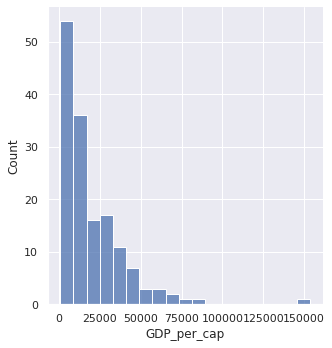

In [ ]:
sns.displot(h01DF.GDP_per_cap)

There is a positive correlation between max data speed and GDP.

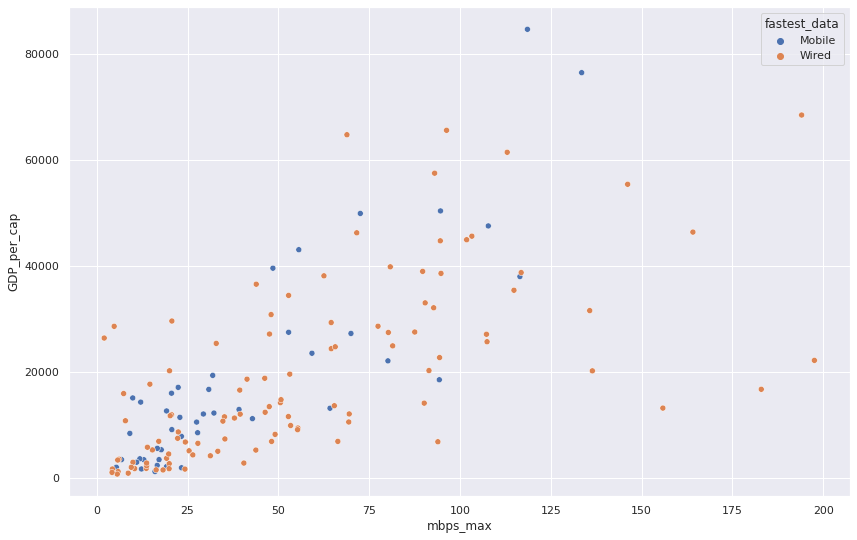

In [ ]:
#remove outlier for clearer vis
GDPLess100k = h01DF.loc[h01DF.GDP_per_cap < 100000]

sns.scatterplot(x='mbps_max', y=GDPLess100k.GDP_per_cap, hue='fastest_data', data= h01DF)

### Statistics

Comparing above or below average GDP countries, there is a strong correlation to data speed and economic performance.

Based on these results we can reject our null hypothesis. Countries with better data speeds usually have better economies.

In [ ]:
# Subset data
avgOrAboveGDP = h01DF.iloc[(h01DF['GDP_rank'] == "Above Average").values]
belowAvgGDP = h01DF.iloc[(h01DF['GDP_rank'] == "Below Average").values]

# Define the groups
h01DF.groupby('GDP_rank').describe()

# T-TEST
stats.ttest_ind(avgOrAboveGDP['mbps_max'], belowAvgGDP['mbps_max'])

Ttest_indResult(statistic=9.81338266791853, pvalue=7.234835301174049e-18)

## Hypothesis 2:
### Countries that rely on mobile data more have worse economies

Based on our previous tests, lets see if countries of different economies rely more on mobile or fixed internet.


### Visualizations

When looking at the fastest data type for each country, mobile is consistently slower and less varied, while wired is more varied but on average faster.

[Text(0, 0.5, 'Fastest Speed'), Text(0.5, 0, 'Connection Type')]

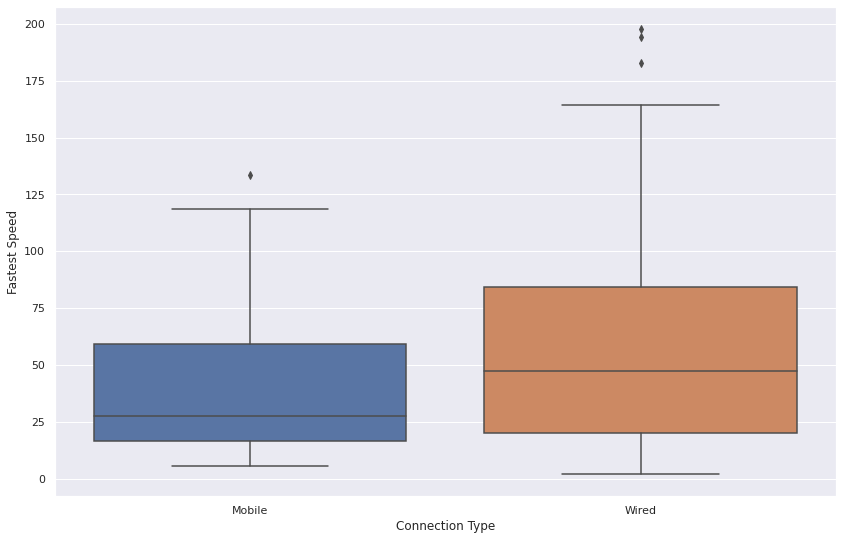

In [ ]:
sns.boxplot(
    y="mbps_max",
    x="fastest_data",
    data=h01DF
).set(
  xlabel='Connection Type', 
  ylabel='Fastest Speed'
)

Here we can see that lower GDP countries usually rely more on mobile data more than higher GDP countries.

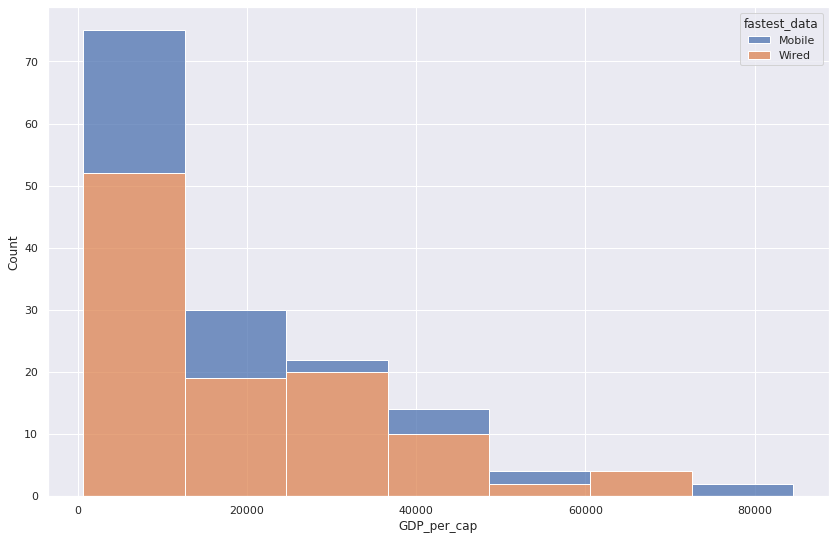

In [ ]:
sns.histplot(data=h01DF, x=GDPLess100k.GDP_per_cap, hue="fastest_data", multiple="stack", bins = 7)

To see which countries rely on each connection type lets make a ranking:

In [ ]:
# add calculated field for speed disparity.
# countries with high mobile data and low broadband data will be ranked at the top.
# a negative result means that country relies more or almost entirely on wired data.

h01DF['mobileSpeedDisparity'] = h01DF["Mbps_mobile"] - h01DF["Mbps_wired"]

Countries with more reliance on mobile data instead of wired data don't seem to have a large difference in GDP rank and below average companies seem to have a larger reliance on mobile data.

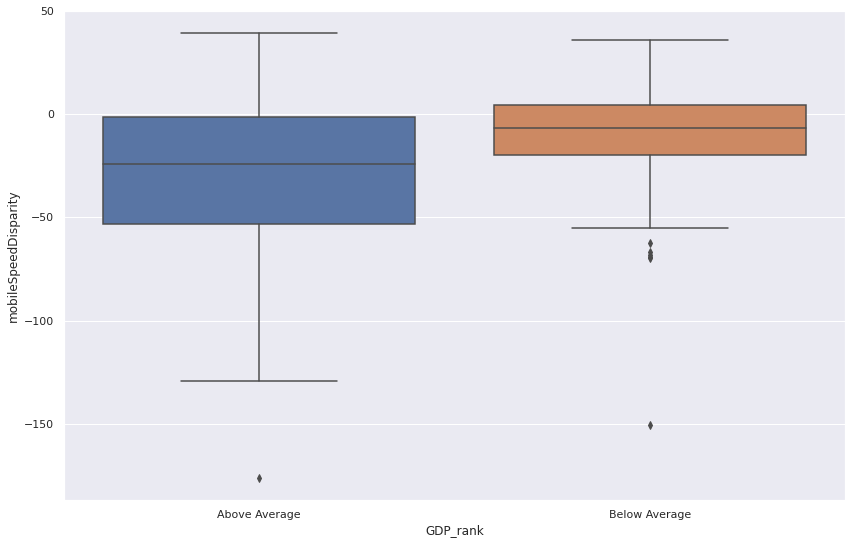

In [ ]:
sns.boxplot(y='mobileSpeedDisparity', x='GDP_rank', data=h01DF)

### Statistics

Mobile data seems to have the strongest correlation to GDP per capita with a value of 0.763.

However, countries that rely mostly or entirely on mobile data actually have a negative correlation. (-0.104

In [ ]:
#pearsonr corr of GDP per capita

GDPcorr = h01DF.corrwith(h01DF['GDP_per_cap'])

GDPcorr.sort_values(ascending = False)

GDP_per_cap             1.000000
Mbps_mobile             0.762170
mbps_max                0.636595
Mbps_wired              0.585859
mobileSpeedDisparity   -0.104019
dtype: float64

Testing for significance we can say with strong confidence that countries that rely more on mobile data have worse economies.

Failed to reject the null hypothesis.

In [ ]:
stats.ttest_ind(h01DF['mobileSpeedDisparity'], h01DF['GDP_per_cap'])

Ttest_indResult(statistic=-11.842434871688488, pvalue=7.836927174050226e-27)

## Conclusion
 
I think that the correlations we found were insightful. Without a shadow of a doubt, the internet is important to a country's economy. Without reliable internet it's much more difficult for communities to work together and for businesses to thrive.
 
Some of the assumptions I had going in were proven to be wrong. Data speed and economic performance are closely correlated, and countries that rely more on mobile data on average have less advanced economies.
 
## Recommendations
 
Based on these findings I'd recommend a combined approach for lower economic countries, focusing on mobile and fixed broadband connections. This will result in bolstering the country's economy. This data can easily be used to advocate for government subsidization of internet connections.
 
For higher GDP countries focusing on more premium mobile speeds seems to be the most intuitive action. I believe these faster speeds are due to several factors like distance to cell towers, and user device quality.
 
## Next steps
 
I would love to find a dataset just like this for speeds over time. That way I could compare economies and internet speeds overtime and see which effects the other even clearer. I'd also like to compare population size and population density, but I could not find a dataset that could be easily joined.